In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Pre Processing

In [54]:
# Convert all the missing Values to NAN
missing_values = ['?','--','-','??','.','unknown']

#Input the Train and Test Data
input_data=pd.read_csv("../input/aid-escalating-internet-coverage/train.csv",na_values=missing_values)
data=input_data.copy()
data
input_data_test=pd.read_csv("../input/aid-escalating-internet-coverage/test.csv",na_values=missing_values)
data_test=input_data_test.copy()
data_test

# Merging the train and test data
y = data["label"]
data.drop("label",axis=1,inplace = True)
df = pd.concat([data,data_test],ignore_index=True)

In [55]:
#Checking which columns contain NA values
df.columns[df.isna().any()].tolist()

['alchemy_category', 'alchemy_category_score', 'is_news', 'news_front_page']

In [56]:
# Printing all the unique Values
for c in df.columns:
    print(df[c].unique())

['http://www.cbc.ca/stevenandchris/2012/11/peggy-ks-sexy-mood-boosting-cupcakes.html'
 'http://www.instructables.com/id/Vegan-Baked-Potato-amp-Spinach-Balls-Fat-Free/'
 'http://www.oled-info.com/toshiba-shows-ultra-thin-flexible-3-oled-display-prototype'
 ... 'http://emptees.com/'
 'http://www.theonion.com/content/news/cost_of_living_now_outweighs'
 'http://6jokes.com/just-hanging-on-the-wall/']
[7426 8430 3469 ... 5494 9302 2633]
['{"url":"cbc ca stevenandchris 2012 11 peggy ks sexy mood boosting cupcakes html","title":"Steven and Chris Peggy K s Sexy Mood Boosting Cupcakes peggy k\'s sexy mood-boosting cupcakes from steven and chris","body":"If you re ready to give your libido a boost with a sweet treat then you re going to want to try Peggy K s sexy mood boosting cupcakes Wet ingredients 1 tablespoon ground chia mixed with 1 4 cup water1 1 2 ripe banana2 tablespoons coconut oil\\u00bd cup walnut butter 2 teaspoon s vanilla extract1 cup almond milk \\u00bd cup coconut sugar Dry ingre

In [57]:
# Counting the Number of Unique Values in each column
df.nunique()

link                                  7395
link_id                               7395
page_description                      7394
alchemy_category                        12
alchemy_category_score                4805
avg_link_size                         5710
common_word_link_ratio_1              4476
common_word_link_ratio_2              4038
common_word_link_ratio_3              3266
common_word_link_ratio_4              2695
compression_ratio                     6453
embed_ratio                            366
frame_based                              1
frame_tag_ratio                       5911
has_domain_link                          2
html_ratio                            7376
image_ratio                           5418
is_news                                  1
lengthy_link_domain                      2
link_word_score                        101
news_front_page                          2
non_markup_alphanumeric_characters    5301
count_of_links                         702
number_of_w

In [58]:
# The number of unique Values in Column is_news is only 1
df["is_news"].value_counts()

1.0    4552
Name: is_news, dtype: int64

In [59]:
# The number of unique Values in Column frame_based is only 1

df["frame_based"].value_counts()

0    7395
Name: frame_based, dtype: int64

In [60]:
# Drop the Columns is_news,frame_based and link
df.drop(labels=["is_news","frame_based","link"],axis=1,inplace=True)

In [61]:
# Now again Check the unique values in every column
df.nunique()

link_id                               7395
page_description                      7394
alchemy_category                        12
alchemy_category_score                4805
avg_link_size                         5710
common_word_link_ratio_1              4476
common_word_link_ratio_2              4038
common_word_link_ratio_3              3266
common_word_link_ratio_4              2695
compression_ratio                     6453
embed_ratio                            366
frame_tag_ratio                       5911
has_domain_link                          2
html_ratio                            7376
image_ratio                           5418
lengthy_link_domain                      2
link_word_score                        101
news_front_page                          2
non_markup_alphanumeric_characters    5301
count_of_links                         702
number_of_words_in_url                  23
parametrized_link_ratio               3922
spelling_mistakes_ratio               4219
dtype: int6

In [62]:
# Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   link_id                             7395 non-null   int64  
 1   page_description                    7395 non-null   object 
 2   alchemy_category                    5047 non-null   object 
 3   alchemy_category_score              5053 non-null   float64
 4   avg_link_size                       7395 non-null   float64
 5   common_word_link_ratio_1            7395 non-null   float64
 6   common_word_link_ratio_2            7395 non-null   float64
 7   common_word_link_ratio_3            7395 non-null   float64
 8   common_word_link_ratio_4            7395 non-null   float64
 9   compression_ratio                   7395 non-null   float64
 10  embed_ratio                         7395 non-null   float64
 11  frame_tag_ratio                     7395 no

In [63]:
# Total values in alchemy_category which is of type Object
df["alchemy_category"].value_counts().sum()

5047

In [64]:
# Checking the frequency of each category 
df["alchemy_category"].value_counts()

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

In [65]:
# filling all the NAN values with the mode i.e. recreation
df["alchemy_category"].fillna("recreation",inplace = True)

In [66]:
# Checking the frequency of each score 

df["alchemy_category_score"].value_counts()

0.850000    82
0.078409    40
0.849999    12
0.535009    10
0.706770     9
            ..
0.474992     1
0.738560     1
0.573796     1
0.372838     1
0.605566     1
Name: alchemy_category_score, Length: 4805, dtype: int64

In [67]:
# Replacing the nan values with the mean
df["alchemy_category_score"].fillna("0",inplace = True)
df["alchemy_category_score"] = pd.to_numeric(df["alchemy_category_score"])
df["alchemy_category_score"].replace(0,df["alchemy_category_score"].sum()/len(df["alchemy_category_score"]),inplace = True)

In [68]:
#checking the total number of rows
df["alchemy_category_score"].value_counts().sum()

7395

In [69]:
# Replacing all the nan values with 1 in news_front_page column
df["news_front_page"].fillna("1",inplace = True)
df["news_front_page"] = pd.to_numeric(df["news_front_page"])

In [70]:
# Rechecking for any NAN values
df.isna().sum()

link_id                               0
page_description                      0
alchemy_category                      0
alchemy_category_score                0
avg_link_size                         0
common_word_link_ratio_1              0
common_word_link_ratio_2              0
common_word_link_ratio_3              0
common_word_link_ratio_4              0
compression_ratio                     0
embed_ratio                           0
frame_tag_ratio                       0
has_domain_link                       0
html_ratio                            0
image_ratio                           0
lengthy_link_domain                   0
link_word_score                       0
news_front_page                       0
non_markup_alphanumeric_characters    0
count_of_links                        0
number_of_words_in_url                0
parametrized_link_ratio               0
spelling_mistakes_ratio               0
dtype: int64

In [71]:
# Changing non-numeric column to numeric column using one-hot encoding
col_one_hot = ["alchemy_category"]
df = pd.get_dummies(df,columns = col_one_hot)

In [72]:
df.head()

,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,...,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_weather
0,7426,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,0.478691,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,8430,"{""title"":""Vegan Potato Spinach Balls Fat Free ...",0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,0.459059,0.000000,...,0,0,0,0,0,1,0,0,0,0
2,3469,"{""title"":""Toshiba shows an ultra thin flexible...",0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,0.550314,0.006289,...,0,0,0,0,0,0,0,0,0,0
3,1326,"{""url"":""collegehumor videos playlist 6472556 e...",0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,0.675824,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,3580,"{""title"":""Shaq admits to taking performance en...",0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,0.932692,0.000000,...,0,0,0,0,0,0,0,0,1,0


# Plotting

In [73]:
# Importing Necessary Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.preprocessing as preprocessing 

array([[<AxesSubplot:title={'center':'link_id'}>,
        <AxesSubplot:title={'center':'alchemy_category_score'}>,
        <AxesSubplot:title={'center':'avg_link_size'}>,
        <AxesSubplot:title={'center':'common_word_link_ratio_1'}>,
        <AxesSubplot:title={'center':'common_word_link_ratio_2'}>,
        <AxesSubplot:title={'center':'common_word_link_ratio_3'}>],
       [<AxesSubplot:title={'center':'common_word_link_ratio_4'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'embed_ratio'}>,
        <AxesSubplot:title={'center':'frame_tag_ratio'}>,
        <AxesSubplot:title={'center':'has_domain_link'}>,
        <AxesSubplot:title={'center':'html_ratio'}>],
       [<AxesSubplot:title={'center':'image_ratio'}>,
        <AxesSubplot:title={'center':'lengthy_link_domain'}>,
        <AxesSubplot:title={'center':'link_word_score'}>,
        <AxesSubplot:title={'center':'news_front_page'}>,
        <AxesSubplot:title={'center':'non_ma

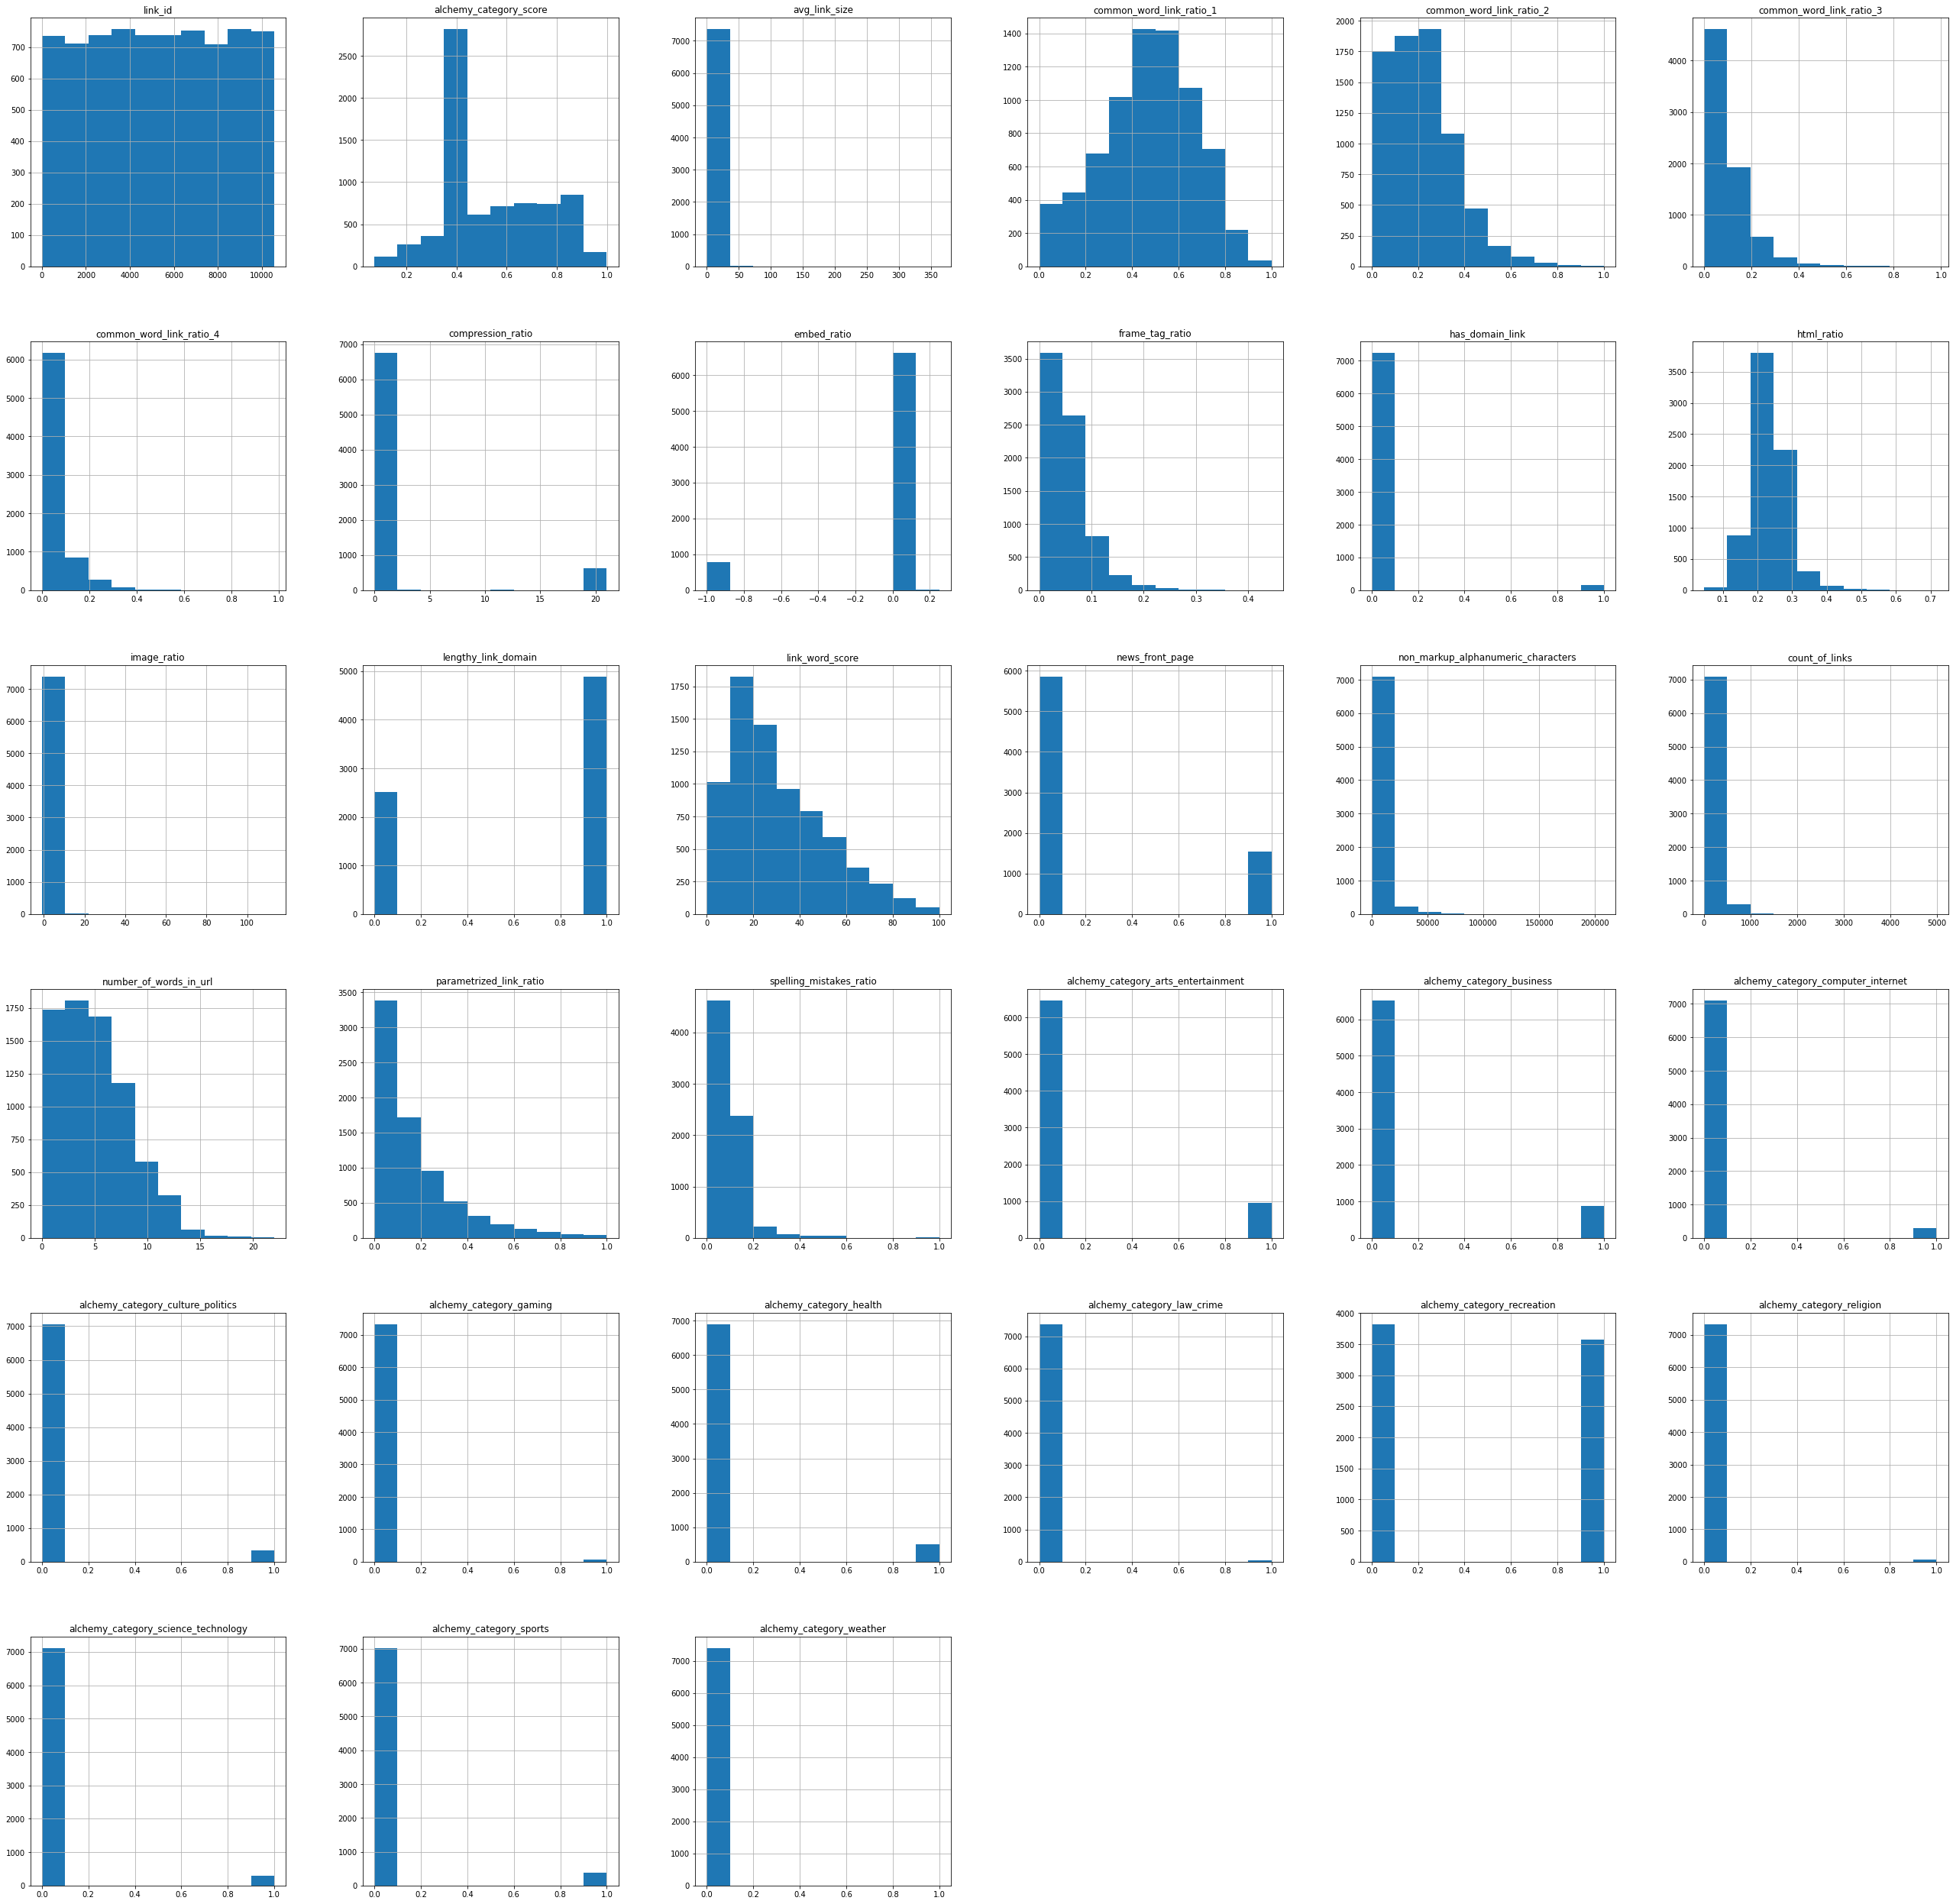

In [74]:
# Plotting Histograms
df.hist(figsize=(45,45))

In [75]:
# Checking the correlation
df.corr()

,link_id,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,frame_tag_ratio,...,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_weather
link_id,1.000000,0.006729,-0.011162,0.002856,0.008407,0.005285,0.009573,-0.007343,0.013340,0.010065,...,0.006661,0.009550,-0.016031,0.011782,0.006671,-0.000904,-0.002142,0.011763,-0.003478,-0.012642
alchemy_category_score,0.006729,1.000000,0.001429,0.070366,0.052290,0.027932,0.021111,-0.183728,0.166633,-0.038990,...,0.165771,0.038618,-0.019051,0.224255,-0.014095,-0.446112,-0.058465,0.006866,0.146525,0.006391
avg_link_size,-0.011162,0.001429,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,...,0.020868,0.037126,-0.003634,0.014828,-0.001189,-0.030411,0.005313,0.012597,-0.009702,0.011769
common_word_link_ratio_1,0.002856,0.070366,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,...,-0.004702,0.011926,-0.067362,0.081700,0.000864,0.017715,-0.021502,0.005058,-0.017911,0.000127
common_word_link_ratio_2,0.008407,0.052290,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,...,-0.000032,0.007112,-0.052645,0.075565,-0.003811,0.000611,-0.002064,0.005694,-0.014854,0.001924
common_word_link_ratio_3,0.005285,0.027932,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,...,-0.004787,0.021413,-0.034898,0.019714,0.002508,0.012081,-0.003948,-0.003874,-0.013576,-0.013370
common_word_link_ratio_4,0.009573,0.021111,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,...,0.014605,0.028267,-0.025737,-0.021232,0.006688,0.006404,-0.000544,0.004487,-0.011861,-0.006076
compression_ratio,-0.007343,-0.183728,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,...,-0.032513,-0.039923,0.015222,-0.044299,0.010690,0.163063,0.005277,-0.029797,-0.042611,0.055231
embed_ratio,0.013340,0.166633,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,...,0.035745,0.033730,-0.012849,0.051675,-0.005218,-0.152112,-0.002317,0.027458,0.048825,-0.049047
frame_tag_ratio,0.010065,-0.038990,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,...,0.042368,0.001021,0.017438,-0.007429,0.040857,-0.043632,0.039599,0.031270,0.042129,0.065581


<AxesSubplot:>

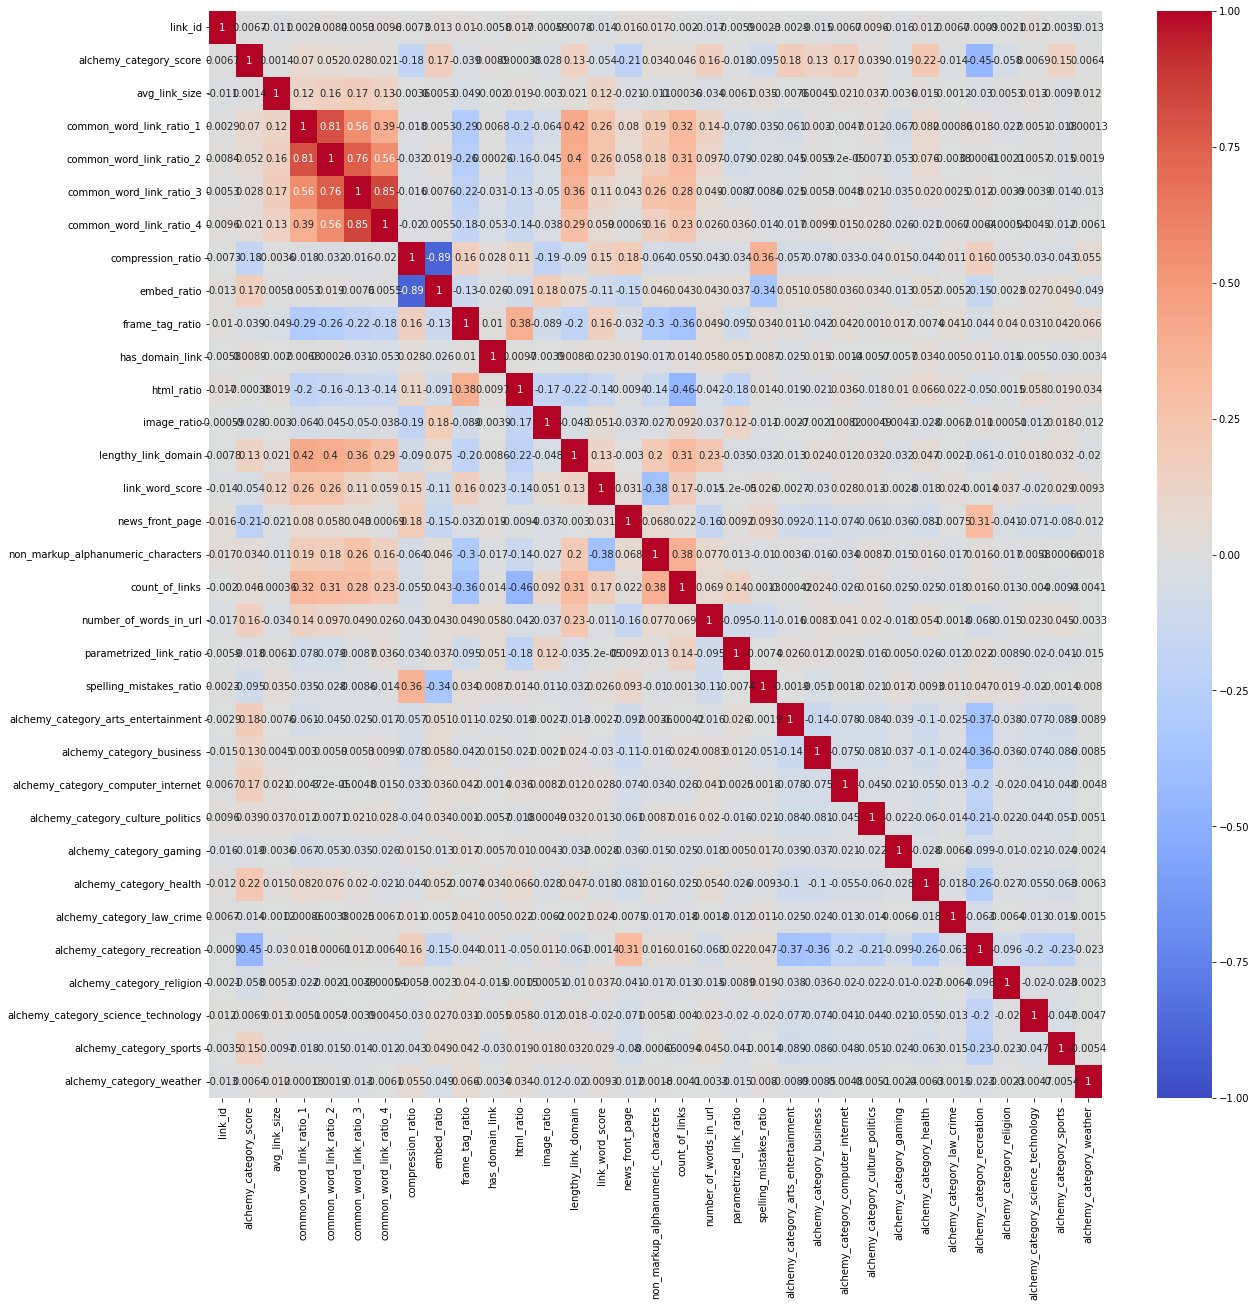

In [76]:
# Plotting the correlation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, cmap="coolwarm", annot=True)

Standardization

In [77]:
# df_train = df.drop("page_description",axis  =1)
# df_new_test1 = df_test.drop("page_description",axis=1)


In [78]:
# from sklearn.preprocessing import StandardScaler

In [79]:
# df_new_columns=df_train.columns
# scaler = StandardScaler()
# for i in df_new_columns:
#     df_train[i] = scaler.fit_transform(df_train[i].to_numpy().reshape(-1, 1)).reshape(-1)

In [80]:
# df_new_columns=df_new_test1.columns
# scaler = StandardScaler()
# for i in df_new_columns:
#     df_new_test1[i] = scaler.fit_transform(df_new_test1[i].to_numpy().reshape(-1, 1)).reshape(-1)

In [81]:
# Checking the Dimensions of the dataframe
df.shape

(7395, 34)

# NLP on train data

In [82]:
# importing Necessary Libraries
import nltk
import re

In [83]:
# Removing all the Special Characters in the page_description
df_new = df["page_description"]

for i in range(df_new.shape[0]):
    df_new[i] = re.sub(r'[^\s\w]', '',df_new[i])
    
   
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [84]:
# converting the page_description to lower case so that model do not differentiate between two same words 
df_new = df_new.str.lower()
df_new.head()

0    urlcbc ca stevenandchris 2012 11 peggy ks sexy...
1    titlevegan potato spinach balls fat free vegan...
2    titletoshiba shows an ultra thin flexible 3 ol...
3    urlcollegehumor videos playlist 6472556 epic s...
4    titleshaq admits to taking performance enhanci...
Name: page_description, dtype: object

In [85]:
# Importing all the necessary libraries for nlp
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stemmer =  PorterStemmer()
stop = stopwords.words('english')

In [86]:
# Removing all the stop words 
only_text = df_new.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
only_text.head()

0    urlcbc ca stevenandchris 2012 11 peggy ks sexy...
1    titlevegan potato spinach balls fat free vegan...
2    titletoshiba shows ultra thin flexible 3 oled ...
3    urlcollegehumor videos playlist 6472556 epic s...
4    titleshaq admits taking performance enhancing ...
Name: page_description, dtype: object

In [87]:
# Splitting each words of the sentence 
only_text = only_text.apply(lambda x : filter(None,x.split(" ")))
print(only_text.head())

0    <filter object at 0x7fb5ce201750>
1    <filter object at 0x7fb5ce2048d0>
2    <filter object at 0x7fb5ce206690>
3    <filter object at 0x7fb5ce207050>
4    <filter object at 0x7fb5ce207ad0>
Name: page_description, dtype: object


In [88]:
# Downloading important Packages 
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [89]:
# Doing lemmatization 
only_text = only_text.apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
print(only_text.head())

0    [urlcbc, ca, stevenandchris, 2012, 11, peggy, ...
1    [titlevegan, potato, spinach, ball, fat, free,...
2    [titletoshiba, show, ultra, thin, flexible, 3,...
3    [urlcollegehumor, video, playlist, 6472556, ep...
4    [titleshaq, admits, taking, performance, enhan...
Name: page_description, dtype: object


In [90]:
# joining all the words back to sentences after lemmatization
only_text = only_text.apply(lambda x : " ".join(x))
print(only_text.head())

0    urlcbc ca stevenandchris 2012 11 peggy k sexy ...
1    titlevegan potato spinach ball fat free vegan ...
2    titletoshiba show ultra thin flexible 3 oled d...
3    urlcollegehumor video playlist 6472556 epic sp...
4    titleshaq admits taking performance enhancing ...
Name: page_description, dtype: object


In [91]:
# Copying the Final output to the original column
df["page_description"] = only_text

In [92]:
# Printing the the first row of the page_description
df['page_description'][0]

'urlcbc ca stevenandchris 2012 11 peggy k sexy mood boosting cupcake htmltitlesteven chris peggy k sexy mood boosting cupcake peggy k sexy moodboosting cupcake steven chrisbodyif ready give libido boost sweet treat going want try peggy k sexy mood boosting cupcake wet ingredient 1 tablespoon ground chia mixed 1 4 cup water1 1 2 ripe banana2 tablespoon coconut oilu00bd cup walnut butter 2 teaspoon vanilla extract1 cup almond milk u00bd cup coconut sugar dry ingredient 1 cup brown rice flouru00bd cup cooked quinoa 3 tablespoon maca powder1 3 cup cocoa powder1 teaspoon baking powder1 teaspoon non aluminum baking sodau00bd teaspoon saltchopped walnut raspberry frosting 1 cup raw cashews1 4 cup maple syrup 1 cup raspberry almond milk cupcake preheat oven 350 f place ground chia small bowl add warm water mix fork set aside gel form mash banana large bowl add oil nut butter vanilla milk stir mix add rest ingredient mix well incorporated grease rubber mini muffin tin coconut oil drop batter ba

In [93]:
# checking the dimensions
df.shape

(7395, 34)

In [94]:
df.head()

,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,...,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_weather
0,7426,urlcbc ca stevenandchris 2012 11 peggy k sexy ...,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,0.478691,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,8430,titlevegan potato spinach ball fat free vegan ...,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,0.459059,0.000000,...,0,0,0,0,0,1,0,0,0,0
2,3469,titletoshiba show ultra thin flexible 3 oled d...,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,0.550314,0.006289,...,0,0,0,0,0,0,0,0,0,0
3,1326,urlcollegehumor video playlist 6472556 epic sp...,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,0.675824,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,3580,titleshaq admits taking performance enhancing ...,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,0.932692,0.000000,...,0,0,0,0,0,0,0,0,1,0


---------------------------------------------------------------------------------

# TF-IDF

In [95]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(min_df = 5, stop_words = 'english',lowercase = 'True')
df_info = pd.DataFrame(cv.fit_transform(df['page_description']).todense())

# Renaming every of the newly Created column
df_info.columns = ['Page_Description_Top_' + str(c) for c in df_info.columns]

# concatenating all the new columns with the original data frame 
df = pd.concat([df, df_info], axis=1)


In [96]:
df.head()

,link_id,page_description,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,...,Page_Description_Top_17739,Page_Description_Top_17740,Page_Description_Top_17741,Page_Description_Top_17742,Page_Description_Top_17743,Page_Description_Top_17744,Page_Description_Top_17745,Page_Description_Top_17746,Page_Description_Top_17747,Page_Description_Top_17748
0,7426,urlcbc ca stevenandchris 2012 11 peggy k sexy ...,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,0.478691,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8430,titlevegan potato spinach ball fat free vegan ...,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,0.459059,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3469,titletoshiba show ultra thin flexible 3 oled d...,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,0.550314,0.006289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1326,urlcollegehumor video playlist 6472556 epic sp...,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,0.675824,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3580,titleshaq admits taking performance enhancing ...,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,0.932692,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Extracting the original train and test data from the dataframe 
Train=df.iloc[:4437,:]
Test=df.iloc[4437:,:]

In [98]:
# taking all the columns except the page_description
x = Train[Train.columns.difference(['page_description'])]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Columns: 17782 entries, Page_Description_Top_0 to spelling_mistakes_ratio
dtypes: float64(17763), int64(7), uint8(12)
memory usage: 601.6 MB


In [99]:
x.head()

,Page_Description_Top_0,Page_Description_Top_1,Page_Description_Top_10,Page_Description_Top_100,Page_Description_Top_1000,Page_Description_Top_10000,Page_Description_Top_10001,Page_Description_Top_10002,Page_Description_Top_10003,Page_Description_Top_10004,...,html_ratio,image_ratio,lengthy_link_domain,link_id,link_word_score,news_front_page,non_markup_alphanumeric_characters,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.267953,0.074074,0,7426,39,0.0,1236,8,0.061224,0.076125
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.211350,0.228464,1,8430,15,0.0,3887,8,0.330435,0.130742
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.314150,0.088050,1,3469,57,0.0,780,8,0.160000,0.076471
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.254601,1.000000,0,1326,35,0.0,2388,6,0.005208,0.090909
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198366,6.166667,1,3580,39,0.0,5020,11,0.299754,0.093023


In [100]:
# taking all the columns except the page_description
Test = Test[Test.columns.difference(['page_description'])]
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 4437 to 7394
Columns: 17782 entries, Page_Description_Top_0 to spelling_mistakes_ratio
dtypes: float64(17763), int64(7), uint8(12)
memory usage: 401.1 MB


In [101]:
x.shape

(4437, 17782)

# Parameter Tuning for logistic Regression

from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()

****define evaluation****

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

****define search space****

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

****define search****

search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

****execute search****

result = search.fit(x, y)

****summarize result****

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


--------------------------------------------------------------------------------

# Parameter Tuning Random Forest

n_estimators = [5,20,50,100] # number of trees in the random forest

max_features = ['auto', 'sqrt'] # number of features in consideration at every split

max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree

min_samples_split = [2, 6, 10] # minimum sample number to split a node

min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node

bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

 Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x, y)

print ('Random grid: ', random_grid, '\n')
print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

--------------------------------------------------------------------------------

# Logistic Regression Model

In [102]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(C=1,penalty='l2')

# fit the model with data
logreg.fit(x, y)

y_pred = logreg.predict(Test)
yp=logreg.predict_proba(Test)[:,1]

# Random Forest Model

In [103]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(random_state=1,max_depth= 80, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200,max_features="sqrt",bootstrap=False) 

 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x, y)
 
# performing predictions on the test dataset
y_pred_rf = clf.predict(Test)
yp_rf=clf.predict_proba(Test)[:,1]




# XGBoost Parameter Tuning

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
           
xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
                   
clf.fit(x, y)

print("Best parameters:", clf.best_params_)

print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# XGBoost

In [ ]:
# import xgboost as xgb
# from xgboost import XGBClassifier

# from sklearn.model_selection import GridSearchCV
# xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

# xg_reg.fit(x,y)
# preds = xg_reg.predict(Test)
# yp_xg= xg_reg.predict_proba(Test)[:,1]

import xgboost as xgb
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 7,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':1000
        }         
           
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x, y)
yp_xg = xgb_clf.predict_proba(Test)[:,1]

# Extracting the probabilities to CSV files

In [ ]:
DF=pd.DataFrame(yp)
DF.to_csv('ss7.csv')

DF=pd.DataFrame(yp_rf)
DF.to_csv('ss20.csv')

DF=pd.DataFrame(yp_xg)
DF.to_csv('ss30.csv')

# VOTING

In [ ]:
# import the voting classifier
from sklearn.ensemble import VotingClassifier

# import the voting regressor
from sklearn.ensemble import VotingRegressor

In [ ]:
# import voting classifier
from sklearn.ensemble import VotingClassifier



# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('RF',clf),
                  ('logreg', logreg),
                  ('xgb_clf', xgb_clf)],  
    voting='soft')



# make predictions with the soft voting model
voting_classifier_soft.fit(x, y)
y_pred_vcs = voting_classifier_soft.predict(Test)

 
yp_vt_soft = voting_classifier_soft.predict_proba(Test)[:,1]  
                  


In [ ]:
DF=pd.DataFrame(yp_vt_soft)
DF.to_csv('s600.csv')

# MULTI-LAYER PERCEPTRON

In [ ]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf_mpl = MLPClassifier(hidden_layer_sizes=(100,50,100,50),
                    random_state=5,
                    verbose=True,activation = "relu",learning_rate="adaptive",
                       solver= "sgd",alpha = 0.05)

# Fit data onto the model
clf_mpl.fit(x,y)
yp_mpl=clf_mpl.predict_proba(Test)[:,1]

In [ ]:
DF=pd.DataFrame(yp_mpl)
DF.to_csv('ss100.csv')

# MULTI-LAYER PERCEPTRON HYPER-PARAMETER TUNING

 from sklearn.neural_network import MLPClassifier
 mlp = MLPClassifier(max_iter=100)

 parameter_space = {
     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
     'activation': ['tanh', 'relu'],
     'solver': ['sgd', 'adam'],
     'alpha': [0.0001, 0.05],
     'learning_rate': ['constant','adaptive'],
 }
 
 
 from sklearn.model_selection import GridSearchCV
 clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
 clf.fit(x, y)
 
Best paramete set
print('Best parameters found:\n', clf.best_params_)